In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
path = '/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Spin Dependent Transport/Measurements'
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size': 18})
ThreeFive = []
EightFive = []
Fields = []
FieldsAvg = []
for filename in os.listdir(os.path.join(path,'Raw/PHE')):
    f = open(os.path.join(path,f'Raw/PHE/{filename}'),'r')
    data = f.readlines()
    f.close()
    data = np.array([i.strip().split('\t') for i in data][:-1]).T
    if len(data) == 0:
        continue
    fild = [float(meas) for meas in data[0]]
    Fields += fild
    FieldsAvg.append([sum(fild)/len(fild), np.sqrt(np.std(fild)**2 + 0.1**2/12)])
    if filename.startswith('35'):
        Angle = float('.'.join(str(ele) for ele in filename.split('-')[1:]))
        ThreeFive.append([Angle,sum([float(meas) for meas in data[1]])/len(data[1])])
    if filename.startswith('85'):
        Angle = float('.'.join(str(ele) for ele in filename.split('-')[1:]))
        EightFive.append([Angle,sum([float(meas) for meas in data[1]])/len(data[1])])
#     df.to_excel(os.path.join(path, filename + ".xlsx"))
ThreeFive = np.array(ThreeFive).T
EightFive = np.array(EightFive).T
EightFive = EightFive[:,EightFive[1] < 30]
FieldsAvg = np.array(FieldsAvg).T

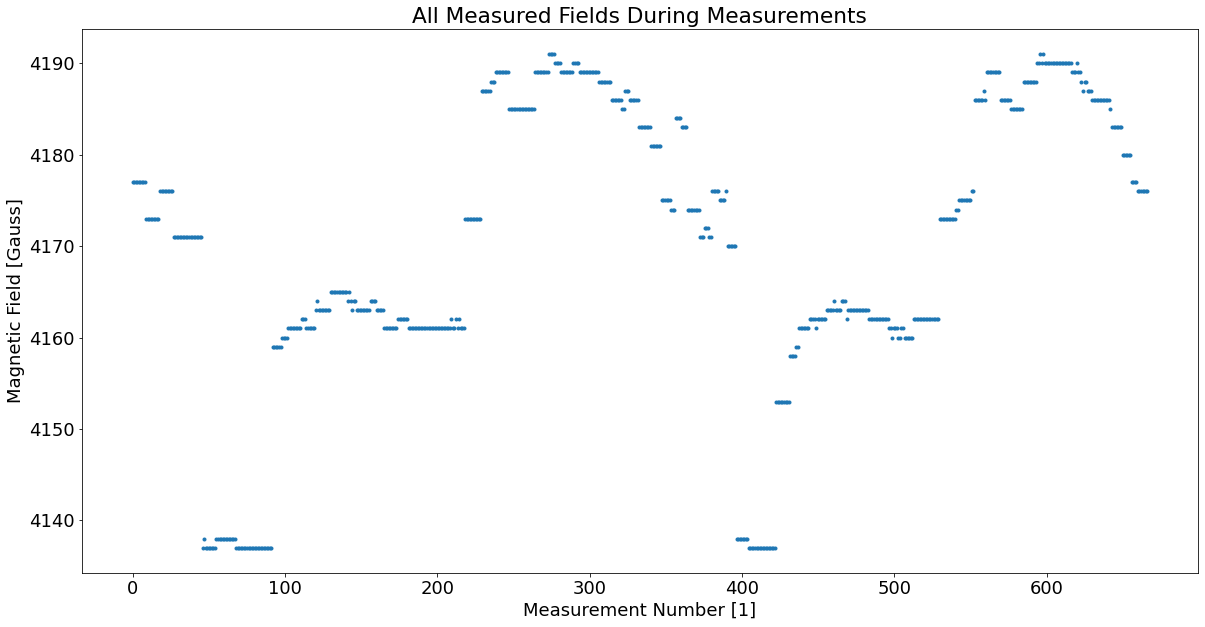

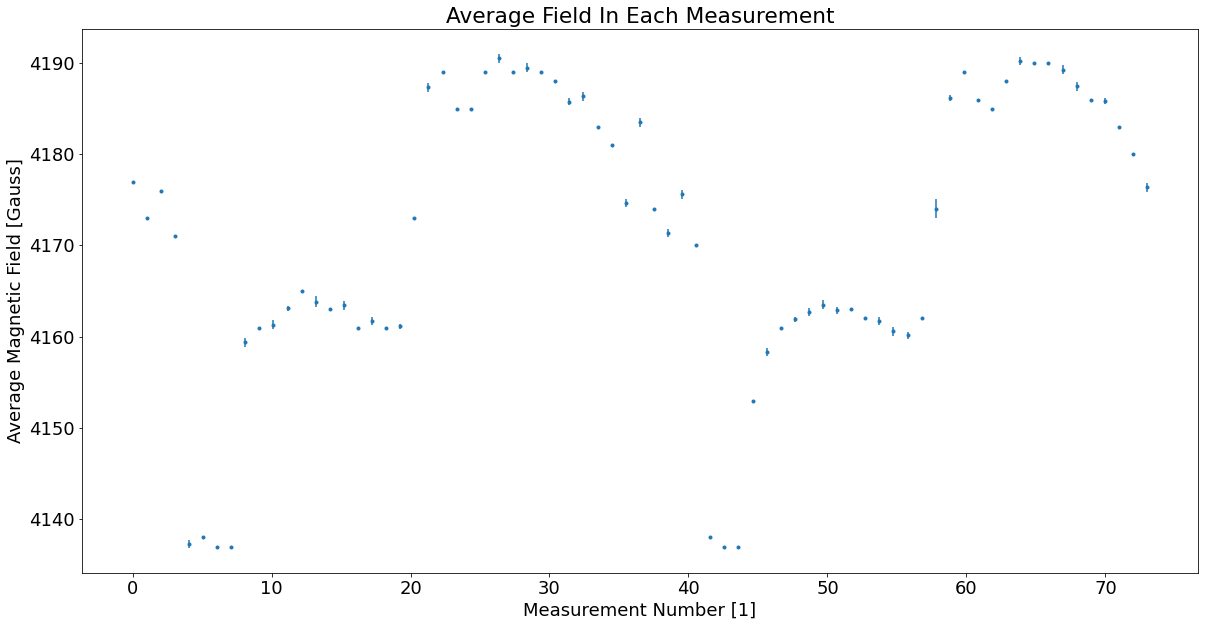

In [20]:
plt.errorbar(x=np.linspace(0,len(Fields),len(Fields)),y=Fields, yerr=np.full_like(Fields,0.1/np.sqrt(12)), fmt='.')
plt.title('All Measured Fields During Measurements')
plt.ylabel('Magnetic Field [Gauss]')
plt.xlabel('Measurement Number [1]')
plt.savefig('Graphs/Field Flactuations.png')
plt.show()
plt.errorbar(x=np.linspace(0,len(FieldsAvg[0]),len(FieldsAvg[0])),y=FieldsAvg[0], yerr=FieldsAvg[1], fmt='.')
plt.title('Average Field In Each Measurement')
plt.ylabel('Average Magnetic Field [Gauss]')
plt.xlabel('Measurement Number [1]')
plt.savefig('Graphs/Field Flactuations Avg.png')
plt.show()

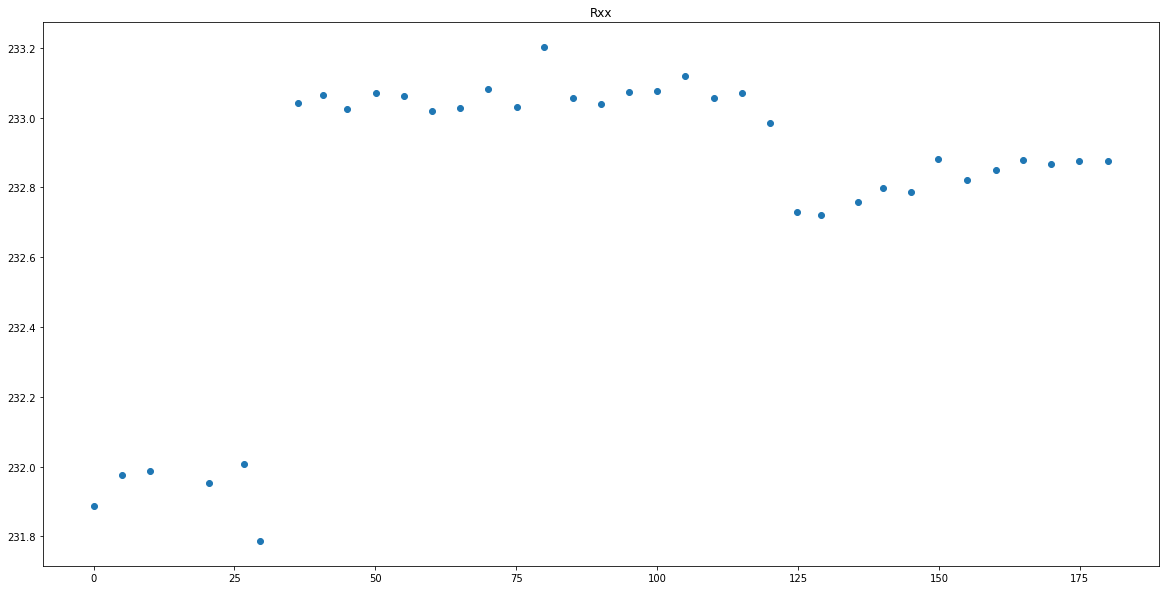

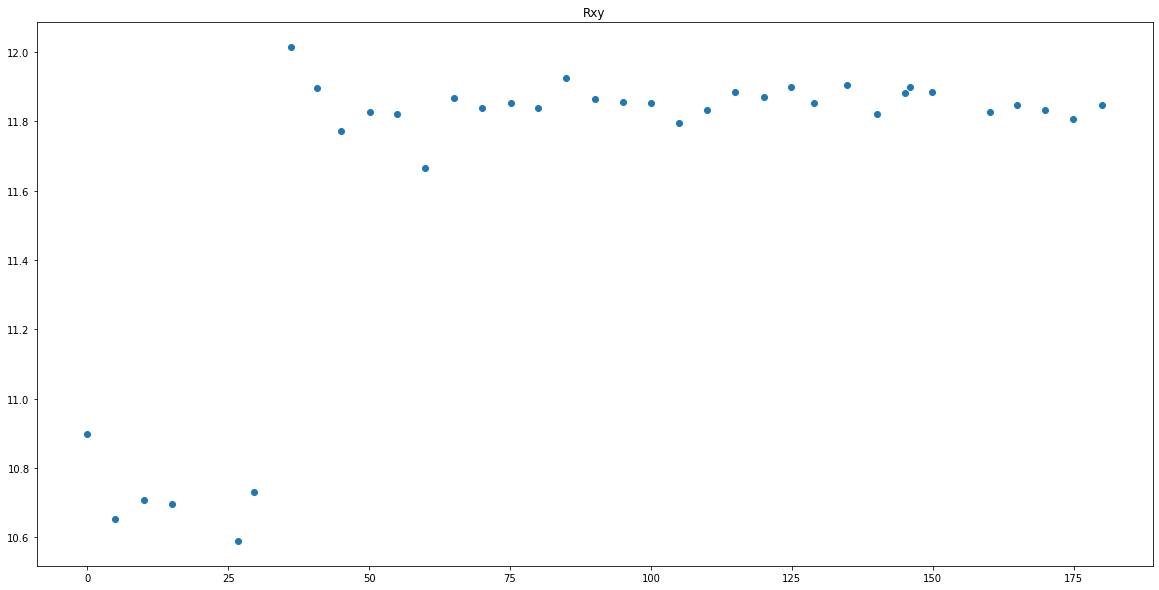

In [34]:
plt.scatter(ThreeFive[0],ThreeFive[1])
plt.title('Rxx')
plt.show()
plt.scatter(EightFive[0],EightFive[1])
plt.title('Rxy')
plt.show()


In [4]:
ThreeFive[1]

array([231.88634444, 231.98858889, 231.97664444, 233.07557368,
       233.11899091, 233.05593636, 233.06912143, 232.98324   ,
       232.72965   , 232.72068889, 232.7577    , 232.79849   ,
       232.78683636, 232.8816    , 232.822575  , 232.84888889,
       232.87808889, 232.86735   , 232.87702222, 232.876408  ,
       231.95206364, 232.00707778, 231.78653333, 233.04331111,
       233.06495   , 233.02374444, 233.0698    , 233.0608625 ,
       233.0203875 , 233.02654444, 233.082     , 233.03173333,
       233.20261111, 233.0574625 , 233.03777143, 233.07305556])